## Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
import csv
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
regions = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
           'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
           'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia',
           'Sardegna', 'Sicilia', 'Toscana', 'Umbria', "Valle d'Aosta", 'Veneto']

In [4]:
# File name
#file_path = "../Data/"
file_path = '/content/drive/Othercomputers/Laptop/homework3/Data/'

df_by_region = {}

# Load data
for reg in regions:

  df_by_region[reg] = pd.read_csv(file_path + str(reg) + '.csv', 
                                   parse_dates = True)
  
  # Put date as index
  df_by_region[reg].set_index('data', inplace=True)


### Work on a single region at a time

In [5]:
region = 'Lombardia'
df_reg = df_by_region[region]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc046b2db10>,
      dtype=object)

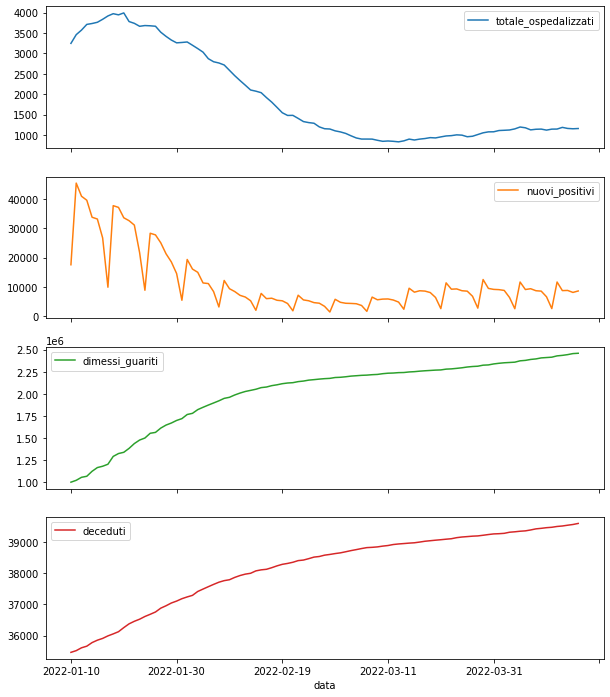

In [6]:
# Plot the evolution of the features

df_reg.plot(subplots=True, figsize=(10,12))

In [ ]:
df_reg.describe()

,totale_ospedalizzati,nuovi_positivi,dimessi_guariti,deceduti
count,97.000000,97.000000,9.700000e+01,97.000000
mean,1921.195876,11640.577320,2.011527e+06,38172.927835
std,1113.154430,10241.629517,3.973563e+05,1180.622993
min,835.000000,1388.000000,1.000102e+06,35464.000000
25%,1014.000000,5417.000000,1.821799e+06,37416.000000
50%,1198.000000,8540.000000,2.172434e+06,38580.000000
75%,3117.000000,11669.000000,2.283121e+06,39107.000000
max,3990.000000,45555.000000,2.459893e+06,39597.000000


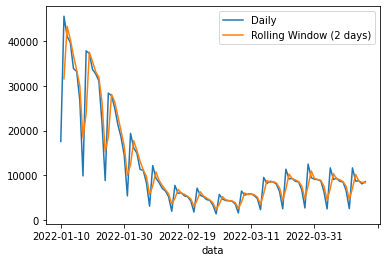

In [11]:
# Use rolling window to smooth the function  
# For each day, consider the average of the 3 previous points

nuovipos = df_reg['nuovi_positivi'].rolling(window=2).mean()
df_reg['nuovi_positivi'].plot(label="Daily")
nuovipos.plot(label="Rolling Window (2 days)")
plt.legend()

Ne vale la pena di fare smoothing?
Le altre features sembrano abbastanza smooth, qui ho paura che si perda il trend

## Correlation
We can measure the correlation between pairs of series to measures how much two time series varies together. For two numerical variables, we can compute Peaeson's product moment coefficient as, 

<font size="3">
$
r_{xy} = \frac{\sum_{i=1}^n (x_i-\overline{x})(y_i-\overline{y})}{\sigma_x \sigma_y}
$
</font>

A high correlation means that the two series strongly vary together (when one increases, the other one also increases; when one decreases, the other one decreases as well). A low correlation means that they vary together but they is a weak association. Finally, a high negative correlation means that they vary in opposite directions but there is still a linear relationship.

In [ ]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="Blues",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)    
    

In [ ]:
g = sns.PairGrid(df_reg, aspect=1, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

In [ ]:
pct_change = pd.DataFrame()

for reg in ['Lombardia', 'Veneto']:
  df_reg = df_by_region[reg]
  pct_change['totale_ospedalizzati_' + reg] = df_reg['totale_ospedalizzati_' + reg].pct_change()
  pct_change['nuovi_positivi_' + reg] = df_reg['nuovi_positivi_' + reg].pct_change()
  pct_change['dimessi_guariti_' + reg] = df_reg['dimessi_guariti_' + reg].pct_change()
  pct_change['deceduti_' + reg] = df_reg['deceduti_' + reg].pct_change()

In [ ]:
confronto = pd.DataFrame()
for reg in ['Lombardia', 'Veneto']:
  col = {'totale_ospedalizzati': 'totale_ospedalizzati_' + reg,
        'nuovi_positivi': 'nuovi_positivi_' + reg,
        'dimessi_guariti': 'dimessi_guariti_' + reg,
        'deceduti': 'deceduti_' + reg,
        }
  df_by_region[reg] = df_by_region[reg].rename(columns = col)
  if confronto.shape[0] == 0:
    confronto = df_by_region[reg]
  else:
    confronto = pd.concat([confronto, df_by_region[reg]], axis=1)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

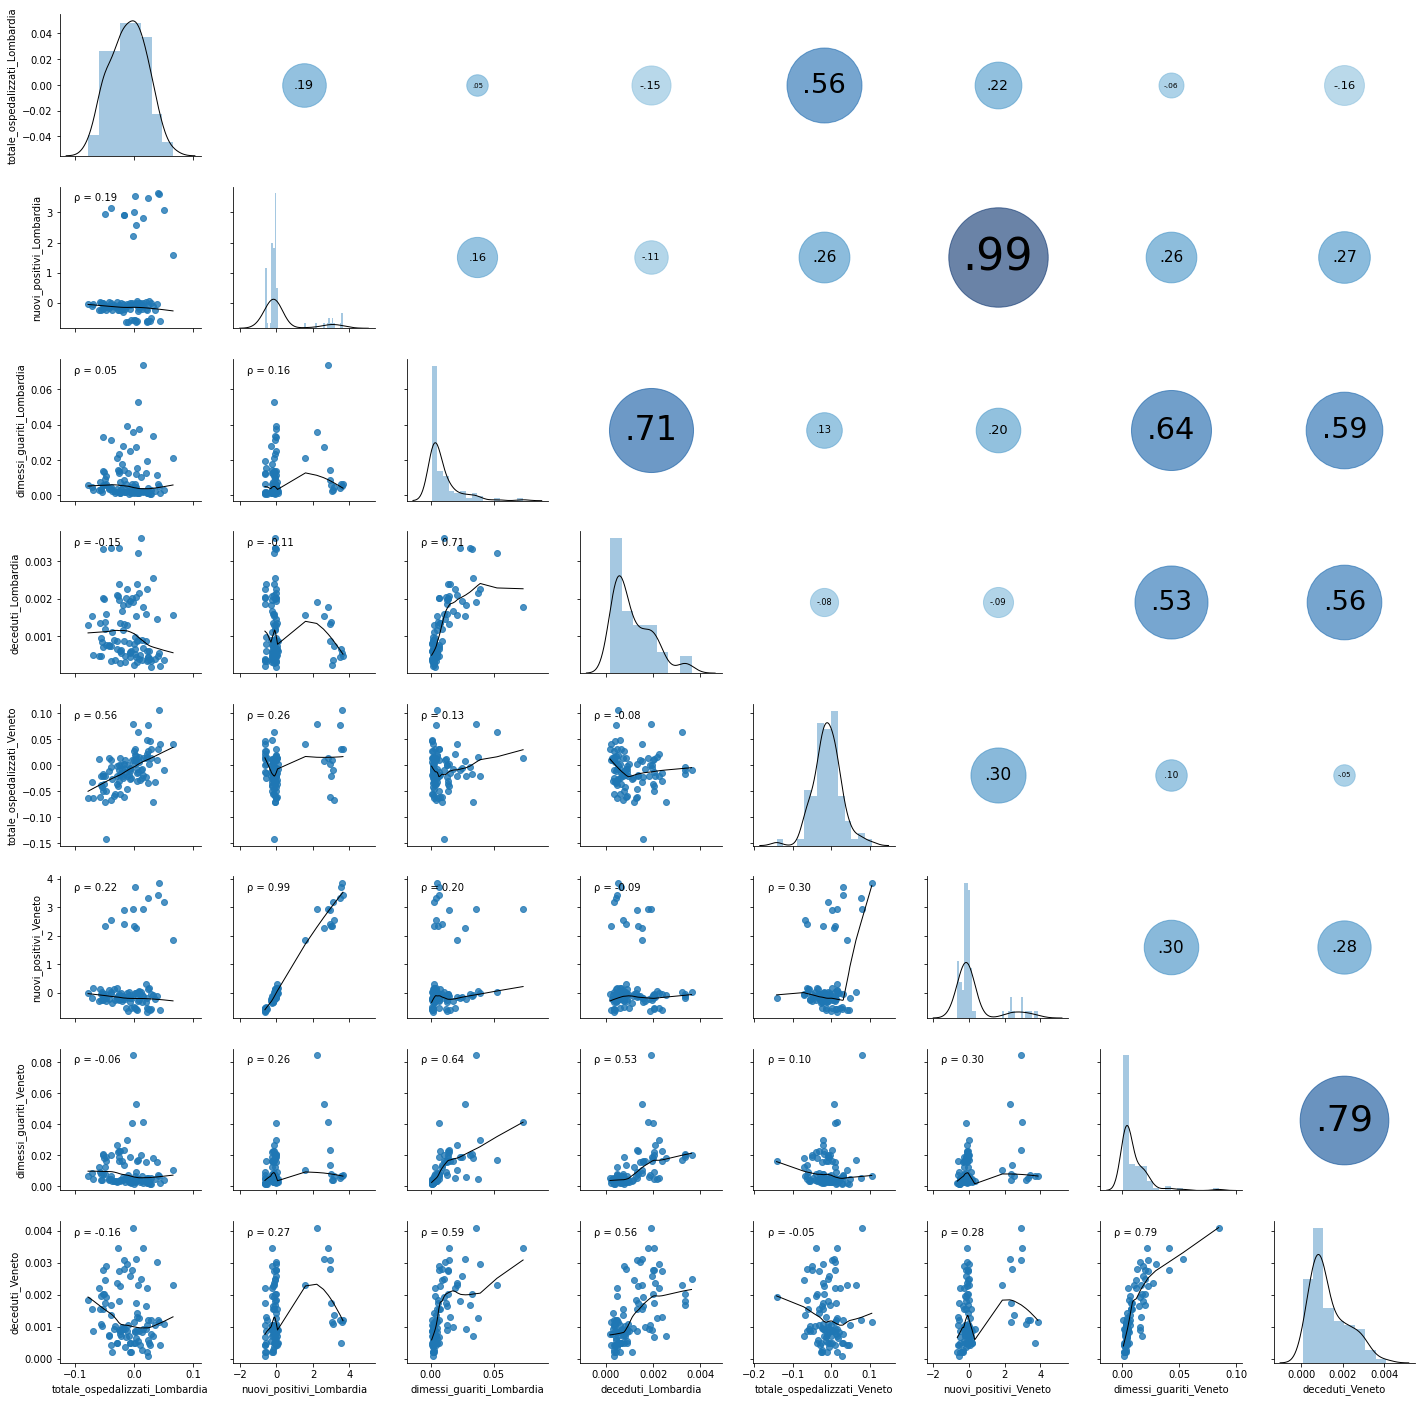

In [ ]:
g = sns.PairGrid(pct_change.dropna(), aspect=1, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

### Train, validation

Utilizziamo come validation gli ultimi 7 giorni. 
Nota che i dati non vengono mescolati casualmente prima di essere suddivisi. Questo per due motivi:

 - Garantisce che sia ancora possibile suddividere i dati in finestre di campioni consecutivi.
 - Garantisce che i risultati della convalida/test siano più realistici, essendo valutati sui dati raccolti dopo che il modello è stato addestrato.

In [ ]:
train_df = {}
val_df = {}

for reg in regions:
  column_indices = {name: i for i, name in enumerate(df_by_region[reg].columns)}

  n = len(df_by_region[reg])
  train_df[reg] = df_by_region[reg][0:n-7]
  val_df[reg] = df_by_region[reg][n-7:]


### Normalizza i dati

È importante ridimensionare le funzionalità prima di addestrare una rete neurale. La normalizzazione è un modo comune per eseguire questo ridimensionamento: sottrarre la media e dividere per la deviazione standard di ciascuna caratteristica.

La media e la deviazione standard devono essere calcolate solo utilizzando i dati di addestramento in modo che i modelli non abbiano accesso ai valori nei set di validazione e test.

È anche discutibile che il modello non dovrebbe avere accesso ai valori futuri nel set di allenamento durante l'allenamento e che questa normalizzazione dovrebbe essere eseguita utilizzando le medie mobili. Per semplicità, utilizziamo una media semplice.

In [ ]:
for reg in regions:

  train_mean = train_df[reg].mean()
  train_std = train_df[reg].std()

  train_df[reg] = (train_df[reg] - train_mean) / train_std
  val_df[reg] = (val_df[reg] - train_mean) / train_std


### Save datasets

In [ ]:
  #path = '../Data/'
  path = '/content/drive/Othercomputers/Laptop/homework3/Data/'

  for reg in regions:

    train_df[reg].to_csv(path + 'Train/' + str(reg) + '.csv')
    
    val_df[reg].to_csv(path + 'Validation/' + str(reg) + '.csv')
